In [1]:
# ! python -m pip install dask distributed --user
# ! pip install --user bokeh
! pip install graphviz --user

In [2]:
from dask.distributed import Client, progress
client = Client( n_workers=1)
client

Client Scheduler: tcp://127.0.0.1:35091 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 1 Cores: 8 Memory: 33.40 GB


In [3]:
import time
import random

def inc(x):
    time.sleep(random.random())
    return x + 1

def dec(x):
    time.sleep(random.random())
    return x - 1

def add(x, y):
    time.sleep(random.random())
    return x + y

In [4]:
%%time
x = inc(1)
y = dec(2)
z = add(x, y)
z

CPU times: user 23.4 ms, sys: 4.92 ms, total: 28.3 ms
Wall time: 1.4 s


3

In [5]:
import dask
inc = dask.delayed(inc)
dec = dask.delayed(dec)
add = dask.delayed(add)

In [6]:
x = inc(1)
y = dec(2)
z = add(x, y)
z

Delayed('add-eba973d5-a584-4369-a0e2-6f0cdfe4c254')

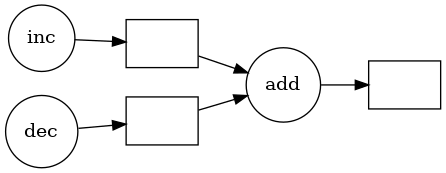

In [7]:
z.visualize(rankdir='LR') #-- needs graphviz - test when you play with dask

In [21]:
z.compute()

3

In [22]:
! aws s3 ls |grep dev

2020-02-11 16:15:38 cd-dev-usgs-eros-sat-api-stagingbucket-1u456p5bmzw7r
2017-10-11 13:15:51 cf-dev-lsdsdpas
2019-03-29 15:57:53 dev-cmahan-test
2019-04-16 18:51:47 dev-dilley
2020-04-20 18:50:03 dev-et-data
2018-02-27 17:14:07 dev-jhedman
2020-04-03 20:56:34 dev-jhedman-logging
2019-07-02 19:27:50 dev-jjfrench
2019-08-23 18:11:49 dev-jpitotdelabeaujar-catalog-test
2020-01-07 22:36:10 dev-landsatlook.dev-lsdsdpas.chs.usgs.gov
2020-03-12 15:34:03 dev-lsaa-wms-cache
2020-04-15 15:04:19 dev-nreinke
2017-11-21 18:08:58 dev-orm
2019-12-03 16:02:23 dev-rhassan
2019-06-26 06:12:11 dev-sshrestha
2019-03-11 21:13:30 dev-test-sunne
2019-09-27 16:25:27 dev-usgs-cloudformation-iam
2019-09-20 16:33:41 dev-usgs-custom-infrastructure-cicd-staging-deploy
2019-09-20 16:11:17 dev-usgs-custom-infrastructure-cicd-staging-test
2020-02-03 22:12:49 dev-usgs-eros-dynamic-tiler
2020-02-03 20:53:38 dev-usgs-eros-sat-api
2019-08-09 13:56:56 dev-usgs-gitlab-runner-cache
2019-08-14 20:16:54 dev-usgs-lambda-code
20

In [10]:
! aws s3 ls chs-pangeo-data-bucket/mcushing/

2020-03-13 15:58:40        147 mycode.py
2020-03-13 18:31:06 99987244856 ngom1_cog.tif
2020-04-02 13:29:05 250720106294 socal_tbdem_1m_cog.tif
2020-03-19 20:12:58 38301508205 socal_tbdem_hll_1m_cog.tif


In [11]:
!rio info  /vsis3/chs-pangeo-data-bucket/mcushing/socal_tbdem_1m_cog.tif

{"blockxsize": 256, "blockysize": 256, "bounds": [179523.99999999822, 3599615.0, 495643.99999999825, 3824832.0], "colorinterp": ["gray"], "compress": "deflate", "count": 1, "crs": "EPSG:26911", "descriptions": [null], "driver": "GTiff", "dtype": "float32", "height": 225217, "indexes": [1], "interleave": "band", "lnglat": [-118.74920746397467, 33.537289805745644], "mask_flags": [["nodata"]], "nodata": -3.4028230607370965e+38, "res": [1.0, 1.0], "shape": [225217, 316120], "tiled": true, "transform": [1.0, 0.0, 179523.99999999822, 0.0, -1.0, 3824832.0, 0.0, 0.0, 1.0], "units": [null], "width": 316120}


In [12]:
!aws s3 ls earthmapprod-datalake-testdata/testdata/


An error occurred (AccessDenied) when calling the ListObjectsV2 operation: Access Denied


In [13]:
! aws s3 ls dev-usgs-landsat/collection1/level2/albers/oli-tirs/2019/030/028/LC08_L1GT_030028_20190210_20190222_01_A2/LC08_L1GT_030028_20190210_20190222_01_A2_sr_band4.tif

2019-09-10 20:08:08   79597684 LC08_L1GT_030028_20190210_20190222_01_A2_sr_band4.tif


In [14]:
! rio info  /vsis3/dev-usgs-landsat/collection1/level2/albers/oli-tirs/2019/030/028/LC08_L1GT_030028_20190210_20190222_01_A2/LC08_L1GT_030028_20190210_20190222_01_A2_sr_band4.tif

{"blockxsize": 256, "blockysize": 256, "bounds": [-245415.0, 2440485.0, -7785.0, 2680515.0], "colorinterp": ["gray"], "compress": "deflate", "count": 1, "crs": "PROJCS[\"Albers\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378140,298.2569999999957,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Albers_Conic_Equal_Area\"],PARAMETER[\"standard_parallel_1\",29.5],PARAMETER[\"standard_parallel_2\",45.5],PARAMETER[\"latitude_of_center\",23],PARAMETER[\"longitude_of_center\",-96],PARAMETER[\"false_easting\",0],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]]]", "descriptions": ["band 4 surface reflectance"], "driver": "GTiff", "dtype": "int16", "height": 8001, "indexes": [1], "interleave": "band", "lnglat": [-97.63264196576377, 46.022995237252296], "mask_flags": [["nodata"]], "nodata": -9999.0, "res": [30.0, 30.0], "shape": [8001, 7921

In [15]:
! rio info  http://dev-usgs-landsat.s3.amazonaws.com/collection1/level2/albers/oli-tirs/2019/030/028/LC08_L1GT_030028_20190210_20190222_01_A2/LC08_L1GT_030028_20190210_20190222_01_A2_sr_band4.tif | python -m json.tool

{
    "blockxsize": 256,
    "blockysize": 256,
    "bounds": [
        -245415.0,
        2440485.0,
        -7785.0,
        2680515.0
    ],
    "colorinterp": [
        "gray"
    ],
    "compress": "deflate",
    "count": 1,
    "crs": "PROJCS[\"Albers\",GEOGCS[\"WGS 84\",DATUM[\"WGS_1984\",SPHEROID[\"WGS 84\",6378140,298.2569999999957,AUTHORITY[\"EPSG\",\"7030\"]],AUTHORITY[\"EPSG\",\"6326\"]],PRIMEM[\"Greenwich\",0],UNIT[\"degree\",0.0174532925199433],AUTHORITY[\"EPSG\",\"4326\"]],PROJECTION[\"Albers_Conic_Equal_Area\"],PARAMETER[\"standard_parallel_1\",29.5],PARAMETER[\"standard_parallel_2\",45.5],PARAMETER[\"latitude_of_center\",23],PARAMETER[\"longitude_of_center\",-96],PARAMETER[\"false_easting\",0],PARAMETER[\"false_northing\",0],UNIT[\"metre\",1,AUTHORITY[\"EPSG\",\"9001\"]]]",
    "descriptions": [
        "band 4 surface reflectance"
    ],
    "driver": "GTiff",
    "dtype": "int16",
    "height": 8001,
    "indexes": [
        1
    ],
    "interleave": "band",
    "ln

In [16]:
! rio info  http://dev-usgs-landsat.s3.amazonaws.com/collection1/level2/albers/oli-tirs/2019/030/028/LC08_L1GT_030028_20190210_20190222_01_A2/LC08_L1GT_030028_20190210_20190222_01_A2_sr_band4.tif | python -m json.tool | grep compre

    "compress": "deflate",


In [23]:
! gdalinfo '/vsis3/dev-usgs-landsat/collection1/level2/albers/oli-tirs/2019/030/028/LC08_L1GT_030028_20190210_20190222_01_A2/LC08_L1GT_030028_20190210_20190222_01_A2_sr_band4.tif'

Driver: GTiff/GeoTIFF
Files: /vsis3/dev-usgs-landsat/collection1/level2/albers/oli-tirs/2019/030/028/LC08_L1GT_030028_20190210_20190222_01_A2/LC08_L1GT_030028_20190210_20190222_01_A2_sr_band4.tif
Size is 7921, 8001
Coordinate System is:
PROJCS["Albers",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378140,298.2569999999957,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]
Origin = (-245415.000000000000000,2680515.000000000000000)
Pixel Size = (30.000000000000000,-30.000000000000000)
Met

In [18]:
!pip list | grep rasterio

rasterio               1.1.3     


In [19]:
! pip list | grep GDAL

GDAL                   2.3.3     
